
# Линейная регрессия. Практическая работа

## Цель практической работы

Научиться строить модель линейной регрессии на реальных данных.

## Что входит в практическую работу


1. Загрузить данные и ознакомиться с ними.
2. Изучить данные и провести анализ.
3. Разделить данные на обучающую и тестовую выборки.
4. Реализовать построение модели с помощью  библиотеки scikit-learn.
5. Получить качество модели с помощью MSE, MAE.


## Что оценивается 

* Выполнены все этапы работы.
* Сделан вывод по результатам.
* Модель не переобучена.
* Получена модель хорошего качества.

## Как отправить работу на проверку

Скачайте файл с заданиями в материалах, откройте его через Jupyter Notebook и выполните задачи. Сохраните изменения при помощи опции Save and Checkpoint из вкладки меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него.



## Что нужно сделать

Пусть у нас имеется некоторый набор данных `sales.csv` о продажах квартир:

- **SalePrice** (цена продажи, *зависимая переменная*).
- **GrLivArea** (наземная жилая зона).
- **OverallQuality** (общее качество).
- **GarageArea** (территория гаража).
- **SaleCondition** (условия сделки).

Реализуйте построение модели линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE. Определите, что вы не переобучились.

### 1. Импорт библиотек

In [78]:
# Ваш код здесь
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

In [79]:
warnings.filterwarnings("ignore")

### 2. Загрузка данных

In [80]:
# Ваш код здесь
data = pd.read_csv('sales.csv')
data = pd.DataFrame(data)
data

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition
0,208500,1710,548,7,Pave,Normal
1,181500,1262,460,6,Pave,Normal
2,223500,1786,608,7,Pave,Normal
3,140000,1717,642,7,Pave,Abnorml
4,250000,2198,836,8,Pave,Normal
...,...,...,...,...,...,...
1455,175000,1647,460,6,Pave,Normal
1456,210000,2073,500,6,Pave,Normal
1457,266500,2340,252,7,Pave,Normal
1458,142125,1078,240,5,Pave,Normal


Пропусков в Датафрейме нет. Есть 1 колонка которого не было в условии. Колонку Street можно удалить так как он не имеет особого значения ведь имеет только 2 значении(Pave - 99.6%, Grvl - 0.4%).

### 3. Первичный анализ

1. Проведите анализ данных, посмотрите на индивидуальные графики зависимости целевой функции и отдельной переменной. Нередко, если признаков в выборке не так много, удобно построить [sns.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html).
2. Закодируйте категориальные признаки (например, с помощью [pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)).
3. Подумайте, можно ли здесь создать дополнительные переменные из имеющихся.
4. Сделайте предварительные выводы.

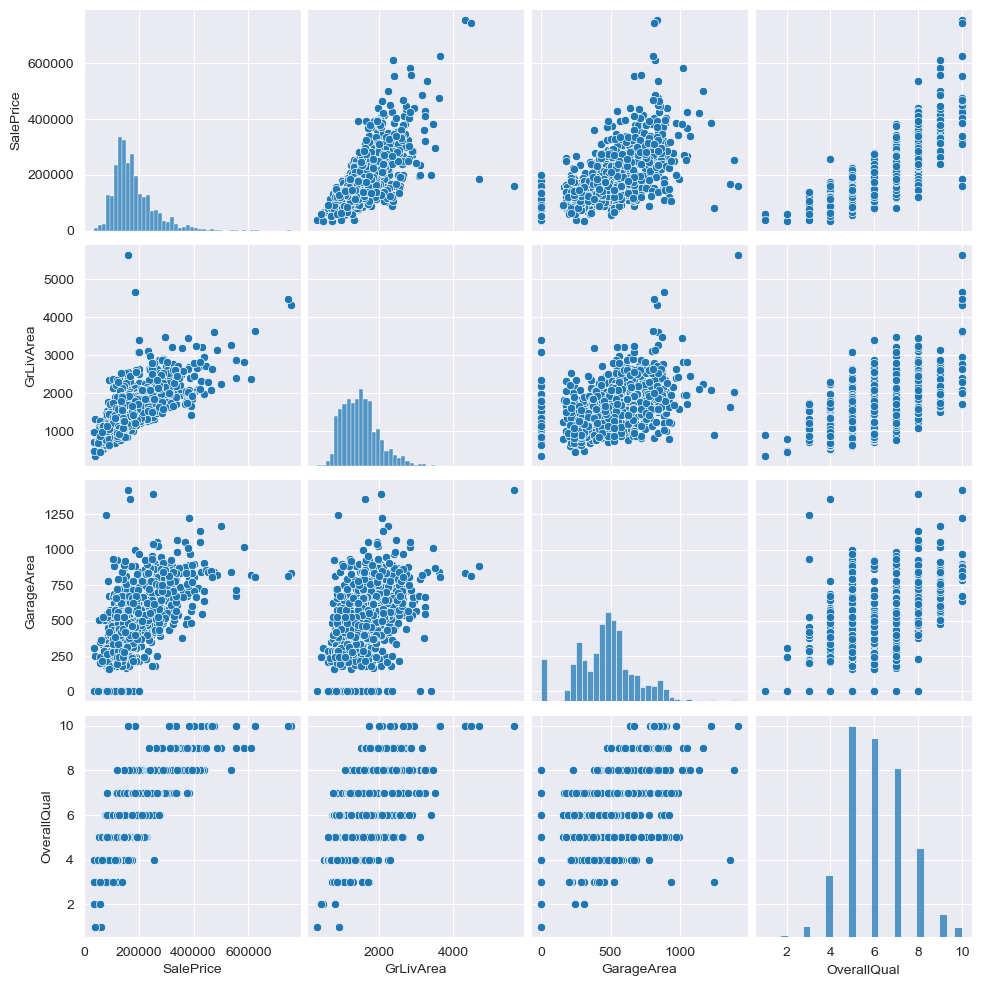

In [81]:
# Ваш код здесь
sns.pairplot(data)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e10963d7d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e11377ea10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e11377ce10>],
 'medians': [<matplotlib.lines.Line2D at 0x1e11377f510>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e113720110>],
 'means': []}

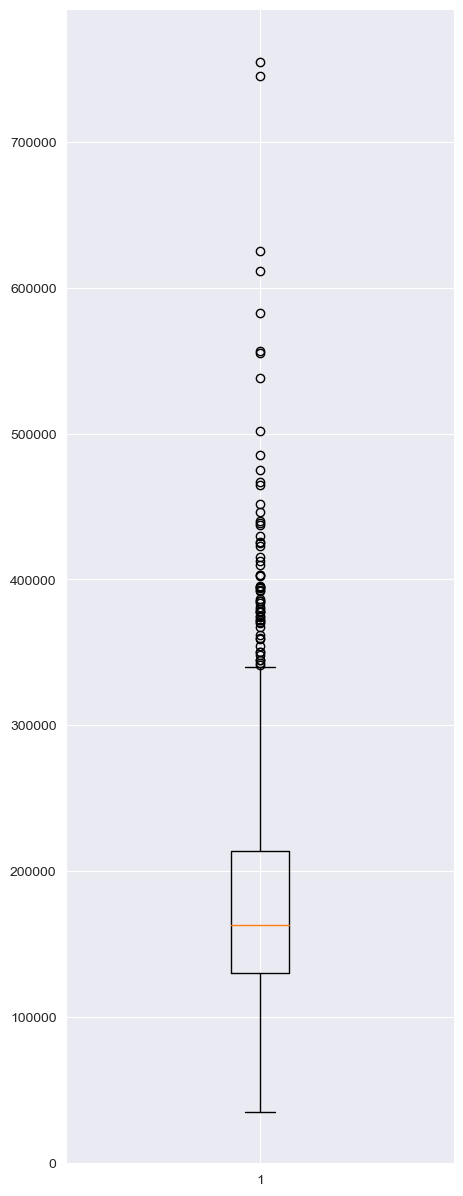

In [82]:
plt.figure(figsize=(5, 15))
plt.boxplot(x=data['SalePrice'])

Видим что 2 значения очень сильно высокие, посмотрим на них

In [83]:
data.sort_values(by='SalePrice', ascending=False).head(10)

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition
691,755000,4316,832,10,Pave,Normal
1182,745000,4476,813,10,Pave,Abnorml
1169,625000,3627,807,10,Pave,Normal
898,611657,2364,820,9,Pave,Partial
803,582933,2822,1020,9,Pave,Partial
1046,556581,2868,716,9,Pave,Partial
440,555000,2402,672,10,Pave,Normal
769,538000,3279,841,8,Pave,Normal
178,501837,2234,1166,9,Pave,Partial
798,485000,3140,820,9,Pave,Partial


Видим что цены растут линейно. Подготовим данные к обучению

In [84]:
df = data.copy()

In [85]:
df = df.drop('Street', axis=1)

In [86]:
df = pd.get_dummies(df, drop_first=True, dtype=np.int64)

In [87]:
df

,SalePrice,GrLivArea,GarageArea,OverallQual,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500,1710,548,7,0,0,0,1,0
1,181500,1262,460,6,0,0,0,1,0
2,223500,1786,608,7,0,0,0,1,0
3,140000,1717,642,7,0,0,0,0,0
4,250000,2198,836,8,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1455,175000,1647,460,6,0,0,0,1,0
1456,210000,2073,500,6,0,0,0,1,0
1457,266500,2340,252,7,0,0,0,1,0
1458,142125,1078,240,5,0,0,0,1,0


Можно было бы создать колонку с общей площадью, и сделать одной общей. Но проблема в том что он только ухудшит модель ибо она станет очень примитивной. Уверен еще что кто-то что-то придумал с условиями сделки(SaleCondition), но как по мне если и есть зависимость то модель сможет вычислить это лучше чем я

### 4. Разделение на обучающую и тестовую выборки

In [88]:
# Ваш код здесь
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 5. Обучение модели линейной регрессии

Дополнительно можно взглянуть на коэффициенты и смещение обученной модели.

In [89]:
# Ваш код здесь
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [90]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [91]:
lin_reg.coef_

array([23831.69547437, 14256.11037237, 36724.15238618,   554.84764067,
        2463.38760795, -1583.65742551,  2740.59515498,  8774.7637683 ])

In [92]:
lin_reg.intercept_

181312.6927592955

In [93]:
lin_reg.score(X_test, y_test)

0.7751542366855402

### 6. Получение предсказаний для обучающей и тестовой выборок

In [94]:
# Ваш код здесь
y_pred = lin_reg.predict(X_test)

In [95]:
y_train_pred = lin_reg.predict(X_train)

### 7. Проверка предсказаний

1. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE.
2. Постройте диаграмму рассеяния целевой и предсказанной переменных. 

In [96]:
# Ваш код здесь
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [97]:
mse

1568994818.1582677

In [98]:
mae

26607.237220516414

In [99]:
rmse

39610.53923084446

In [100]:
y_test.mean()

180007.70319634702

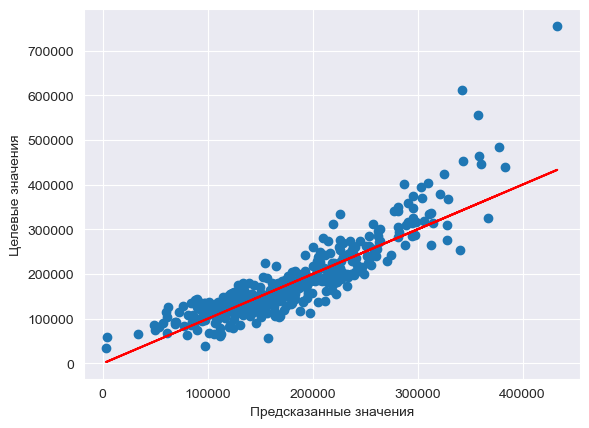

In [101]:
plt.scatter(y_pred, y_test)

plt.plot(y_pred, y_pred, color="red")

plt.xlabel("Предсказанные значения")
plt.ylabel("Целевые значения")
plt.show()

Видим что модель справилась, хоть и не лучшим образом. Ошибки в среднем по метрике абсолютных ошибок -18% и по метрике квадратного корня - 26,5%

Доработаем модель

In [102]:
data['GarageArea'].describe()

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

Попробуем так. Сначало я создам колонку TotalArea, которая будет взята из GrLivArea(наземная жилая зона) + GarageArea (территория гаража). Далее создадим колонку HasGarage, которая будет отвечать есть ли гараж лил нет, принимая 1 если больше 0, и 0 если 0. После этого создадим оценочную колонку которая будет принимать от 0 до 5 в зависимости от квантилей гаража. В самом конце удалим GrLivArea и GarageArea

In [103]:
df2 = data.copy()

In [104]:
df2['TotalArea'] = df2['GrLivArea'] + df2['GarageArea']

In [105]:
df2['HasGarage'] = (df2['GarageArea'] > 0).astype(int)
df2

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition,TotalArea,HasGarage
0,208500,1710,548,7,Pave,Normal,2258,1
1,181500,1262,460,6,Pave,Normal,1722,1
2,223500,1786,608,7,Pave,Normal,2394,1
3,140000,1717,642,7,Pave,Abnorml,2359,1
4,250000,2198,836,8,Pave,Normal,3034,1
...,...,...,...,...,...,...,...,...
1455,175000,1647,460,6,Pave,Normal,2107,1
1456,210000,2073,500,6,Pave,Normal,2573,1
1457,266500,2340,252,7,Pave,Normal,2592,1
1458,142125,1078,240,5,Pave,Normal,1318,1


In [106]:
df2['GarageQuartile'] = 0

df2.loc[df2['GarageArea'] == 0, 'GarageQuartile'] = 0
df2.loc[(df2['GarageArea'] > 0) & (df2['GarageArea'] <= 334.5), 'GarageQuartile'] = 1
df2.loc[(df2['GarageArea'] > 334.5) & (df2['GarageArea'] <= 480), 'GarageQuartile'] = 2
df2.loc[(df2['GarageArea'] > 480) & (df2['GarageArea'] <= 576), 'GarageQuartile'] = 3
df2.loc[(df2['GarageArea'] > 576) & (df2['GarageArea'] <= 1000), 'GarageQuartile'] = 4
df2.loc[df2['GarageArea'] > 1000, 'GarageQuartile'] = 5

In [107]:
df2 = df2.drop(['GrLivArea', 'GarageArea'], axis=1)

In [108]:
df2 = df2.drop('Street', axis=1)

In [109]:
df2 = pd.get_dummies(df2, drop_first=True, dtype=np.int64)

In [110]:
df2

,SalePrice,OverallQual,TotalArea,HasGarage,GarageQuartile,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500,7,2258,1,3,0,0,0,1,0
1,181500,6,1722,1,2,0,0,0,1,0
2,223500,7,2394,1,4,0,0,0,1,0
3,140000,7,2359,1,4,0,0,0,0,0
4,250000,8,3034,1,4,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,2107,1,2,0,0,0,1,0
1456,210000,6,2573,1,3,0,0,0,1,0
1457,266500,7,2592,1,1,0,0,0,1,0
1458,142125,5,1318,1,1,0,0,0,1,0


In [111]:
X = df2.drop('SalePrice', axis=1)
y = df2['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [112]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [113]:
minmax = MinMaxScaler()
scaled_X_train = minmax.fit_transform(scaled_X_train)
scaled_X_test = minmax.transform(scaled_X_test)

In [114]:
model = LinearRegression()
model.fit(scaled_X_train, y_train)

LinearRegression()

In [115]:
model.coef_

array([241466.60858342, 304130.67357975, -13797.08521345,  25362.06295753,
         1891.38968769,  34436.96244561, -10162.83346491,   8168.14387953,
        32774.52233691])

In [116]:
model.intercept_

-40818.309804880206

In [117]:
y_test_pred = model.predict(scaled_X_test)
y_train_pred = model.predict(scaled_X_train)

In [118]:
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

In [119]:
print(f'Метрики на тестовой выборке: \n mse - {mse}, \n mae - {mae}, \n rmse - {rmse}, \n Средняя стоимость - {y_test.mean()}')
print(f'Метрики на тренировочной выборке: \n mse - {mse_train}, \n mae - {mae_train}, \n rmse - {rmse_train}, \n Средняя стоимость - {y_train.mean()}')

Метрики на тестовой выборке: 
 mse - 1563576455.4214127, 
 mae - 26547.142609995895, 
 rmse - 39542.084611479615, 
 Средняя стоимость - 180007.70319634702
Метрики на тренировочной выборке: 
 mse - 1604442116.4112341, 
 mae - 26467.021811294406, 
 rmse - 40055.487968707035, 
 Средняя стоимость - 181312.6927592955


Ошибок стало даже больше О_о

Посмотрим на график

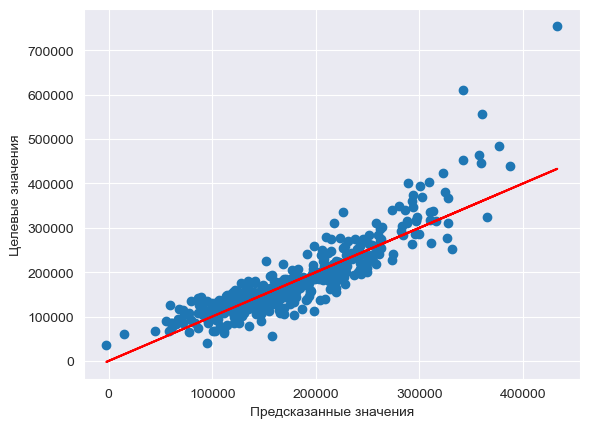

In [120]:
plt.scatter(y_test_pred, y_test)

plt.plot(y_test_pred, y_test_pred, color="red")

plt.xlabel("Предсказанные значения")
plt.ylabel("Целевые значения")
plt.show()

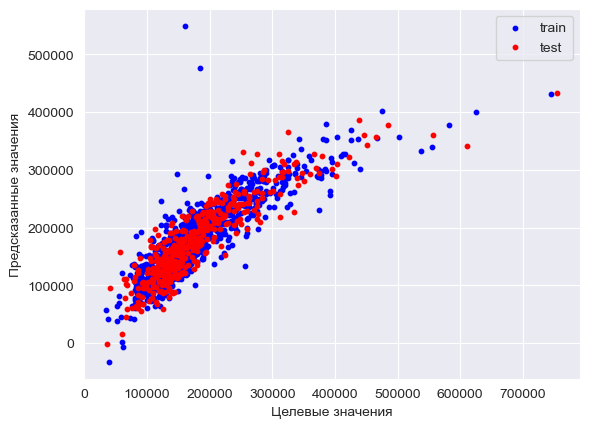

In [121]:
plt.scatter(y_train, y_train_pred, s=10, label='train', c='b')
plt.scatter(y_test, y_test_pred, s=10, label='test', c='r')
plt.xlabel('Целевые значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.show()

Не хотел я этого делать но раз по другому не получается то придется избавиться от выбросов

In [122]:
df3 = data.copy()

In [123]:
def remove_outliers(df):
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in num_cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df3 = remove_outliers(df3)

In [124]:
df3

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition
0,208500,1710,548,7,Pave,Normal
1,181500,1262,460,6,Pave,Normal
2,223500,1786,608,7,Pave,Normal
3,140000,1717,642,7,Pave,Abnorml
4,250000,2198,836,8,Pave,Normal
...,...,...,...,...,...,...
1455,175000,1647,460,6,Pave,Normal
1456,210000,2073,500,6,Pave,Normal
1457,266500,2340,252,7,Pave,Normal
1458,142125,1078,240,5,Pave,Normal


In [125]:
df3 = df3.drop('Street', axis=1)

In [126]:
df3 = pd.get_dummies(df3, drop_first=True, dtype=np.int64)

In [127]:
X = df3.drop('SalePrice', axis=1)
y = df3['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [128]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [129]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(scaled_X_train, y_train)

LinearRegression()

In [130]:
lin_reg_model.coef_

array([19210.80683155, 13791.61253226, 26930.83293078,  1150.00651025,
        1086.08174156,   708.01851007,  5310.03565371,  7226.94558035])

In [131]:
lin_reg_model.intercept_

167865.51359832636

In [132]:
y_test_pred = lin_reg_model.predict(scaled_X_test)
y_train_pred = lin_reg_model.predict(scaled_X_train)

In [133]:
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

In [134]:
print(f'Метрики на тестовой выборке: \n mse - {mse}, \n mae - {mae}, \n rmse - {rmse}, \n Средняя стоимость - {y_test.mean()}')
print(f'Метрики на тренировочной выборке: \n mse - {mse_train}, \n mae - {mae_train}, \n rmse - {rmse_train}, \n Средняя стоимость - {y_train.mean()}')

Метрики на тестовой выборке: 
 mse - 854307882.1627355, 
 mae - 22101.736271041922, 
 rmse - 29228.54567306994, 
 Средняя стоимость - 170627.65693430658
Метрики на тренировочной выборке: 
 mse - 762368224.0795747, 
 mae - 20958.349747090837, 
 rmse - 27611.016353614632, 
 Средняя стоимость - 167865.51359832636


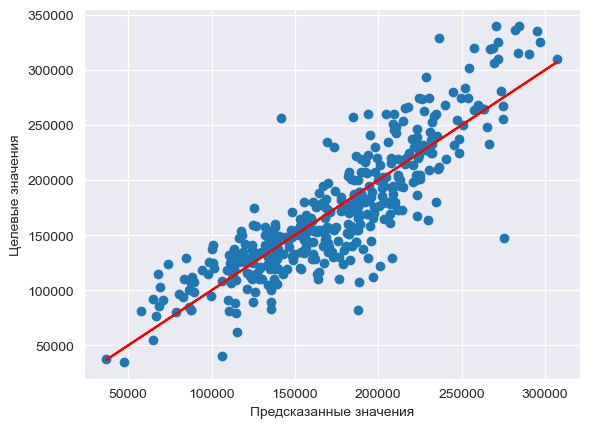

In [135]:
plt.scatter(y_test_pred, y_test)

plt.plot(y_test_pred, y_test_pred, color="red")

plt.xlabel("Предсказанные значения")
plt.ylabel("Целевые значения")
plt.show()

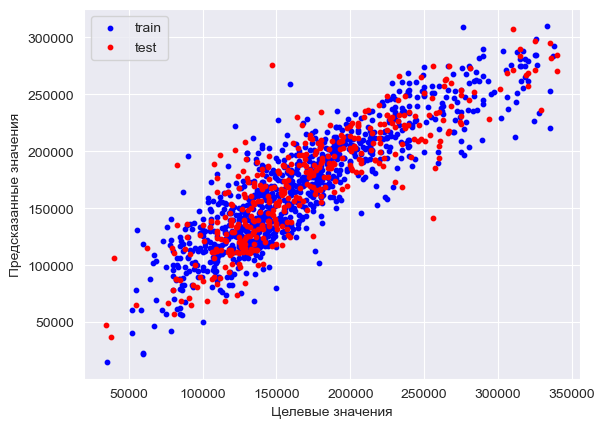

In [136]:
plt.scatter(y_train, y_train_pred, s=10, label='train', c='b')
plt.scatter(y_test, y_test_pred, s=10, label='test', c='r')
plt.xlabel('Целевые значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.show()

Я не хотел ничего удалять потому что рост цен был линейным, и я не хотел что бы модель знала только малые цены для домов. Я предпологаю что изза малого количества данных дома с большими ценами мешают модели хорошо себя показывать